In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib as mp1 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
# this is just example

1. Data Importing and Pre-processing

1.1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [12]:
#Importing the data as dataframe.We are going to use pd.read_csv to import the file in dataframe.

In [ ]:
df =pd.read_csv('/Users/niyatkahsay/Desktop/ADS500B/week_six/Dataset 2 (House Sales)/house_sales.csv')

In [13]:
## Looking few rows os data at glance 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
print(df.shape) ## Shape attribute gives us dimension of dataframe so lets's use .shape to identify number of rows and columns of dataframe.

(21613, 21)


In [15]:
print(df.dtypes) ## dttypes attribute tells us data types of each column from the the dataframe.

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [16]:
## Let's use Python's built in libraray to identyfy the extenstion of file using os.path.splitext().

file_extension = os.path.splitext("house_sales.csv")
print(file_extension)

('house_sales', '.csv')


In [21]:
numeric_columns = df.select_dtypes(include=['number']).columns
nonnumeric_columns =df.select_dtypes(exclude=['number']).columns

print (numeric_columns)
print (nonnumeric_columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['date'], dtype='object')


1.2.Clean, wrangle, and handle missing data.

lets's count null values for each columns

In [18]:
null_counts = df.isnull().sum()

print(null_counts)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [19]:
null_counts2 = df.isnull().sum()
print(null_counts2)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [24]:
#Normalize columns all numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify normalization
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [ ]:
1.4. Reduce redundant data and perform need-based discretization

In [25]:
# Check duplicates based on the 'id' column.
duplicates = df.duplicated(subset=['id'], keep=False)

# identyfying dataframe duplicate_rows from the df to get the duplicate rows
duplicate_rows = df[duplicates]

print(duplicate_rows)

             id             date     price  bedrooms  bathrooms  sqft_living  \
93     0.608193  20140725T000000  0.046557  0.090909    0.18750     0.109694   
94     0.608193  20141223T000000  0.081967  0.090909    0.18750     0.109694   
313    0.418071  20140618T000000  0.171672  0.121212    0.40625     0.340136   
314    0.418071  20141209T000000  0.173770  0.121212    0.40625     0.340136   
324    0.759572  20140905T000000  0.020590  0.060606    0.12500     0.080782   
...         ...              ...       ...       ...        ...          ...   
20670  0.865124  20150330T000000  0.056000  0.121212    0.31250          NaN   
20779  0.636327  20140626T000000  0.021639  0.121212    0.12500     0.077381   
20780  0.636327  20150504T000000  0.040000  0.121212    0.12500     0.077381   
21580  0.793254  20141003T000000  0.068179  0.090909    0.37500     0.211735   
21581  0.793254  20150504T000000  0.072131  0.090909    0.37500     0.211735   

       sqft_lot  floors  waterfront  vi

In [27]:
df = df.drop_duplicates(subset=['id'], keep='last') ## we decided to keep last from each dupe id

In [29]:
# Check duplicates based on the 'id' column.
duplicates = df.duplicated(subset=['id'], keep=False)

# identyfying dataframe duplicate_rows from the df to get the duplicate rows
duplicate_rows = df[duplicates]

print(duplicate_rows)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [ ]:
#2.1. Identify Categorical, Ordinal, and Numerical Variables

In [32]:
categorical_vars = ['waterfront', 'view', 'zipcode']
ordinal_vars = ['grade']
numerical_vars = list(set(df.columns) - set(categorical_vars) - set(ordinal_vars) - {'id', 'date'})

print("Categorical variables:", categorical_vars)
print("Ordinal variables:", ordinal_vars)
print("Numerical variables:", numerical_vars)

Categorical variables: ['waterfront', 'view', 'zipcode']
Ordinal variables: ['grade']
Numerical variables: ['bathrooms', 'sqft_basement', 'condition', 'yr_renovated', 'lat', 'sqft_lot15', 'yr_built', 'sqft_lot', 'sqft_above', 'price', 'long', 'sqft_living', 'floors', 'sqft_living15', 'bedrooms']


In [ ]:
# 2.2. Measures of Centrality and Distribution with Visualizations

In [80]:
#lets find numerical summary first (statistical distribution)
numerical_summary = df[numerical_vars].describe()
numerical_summary


,bathrooms,sqft_basement,condition,yr_renovated,lat,sqft_lot15,yr_built,sqft_lot,sqft_above,price,long,sqft_living,floors,sqft_living15,bedrooms
count,20374.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,20402.000000,21436.000000,21436.000000,21436.000000,20336.000000,21436.000000,21436.000000,20309.000000
mean,0.264511,0.060528,0.602596,0.042050,0.650244,0.013939,0.618247,0.008897,0.164579,0.061200,0.253574,0.152550,0.198479,0.273501,0.102230
std,0.096080,0.091863,0.162559,0.199718,0.222939,0.031446,0.255524,0.025200,0.090902,0.048172,0.117023,0.077876,0.216155,0.118000,0.028174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218750,0.000000,0.500000,0.000000,0.506997,0.005111,0.452174,0.002738,0.099781,0.032769,0.158638,0.096939,0.000000,0.187747,0.090909
50%,0.281250,0.000000,0.500000,0.000000,0.669294,0.008005,0.652174,0.004301,0.139254,0.049180,0.240033,0.138605,0.200000,0.247978,0.090909
75%,0.312500,0.116183,0.750000,0.000000,0.839794,0.010839,0.843478,0.006176,0.211623,0.074754,0.328073,0.192177,0.400000,0.339184,0.121212
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#visualizations 
#first histogram for numerical values 

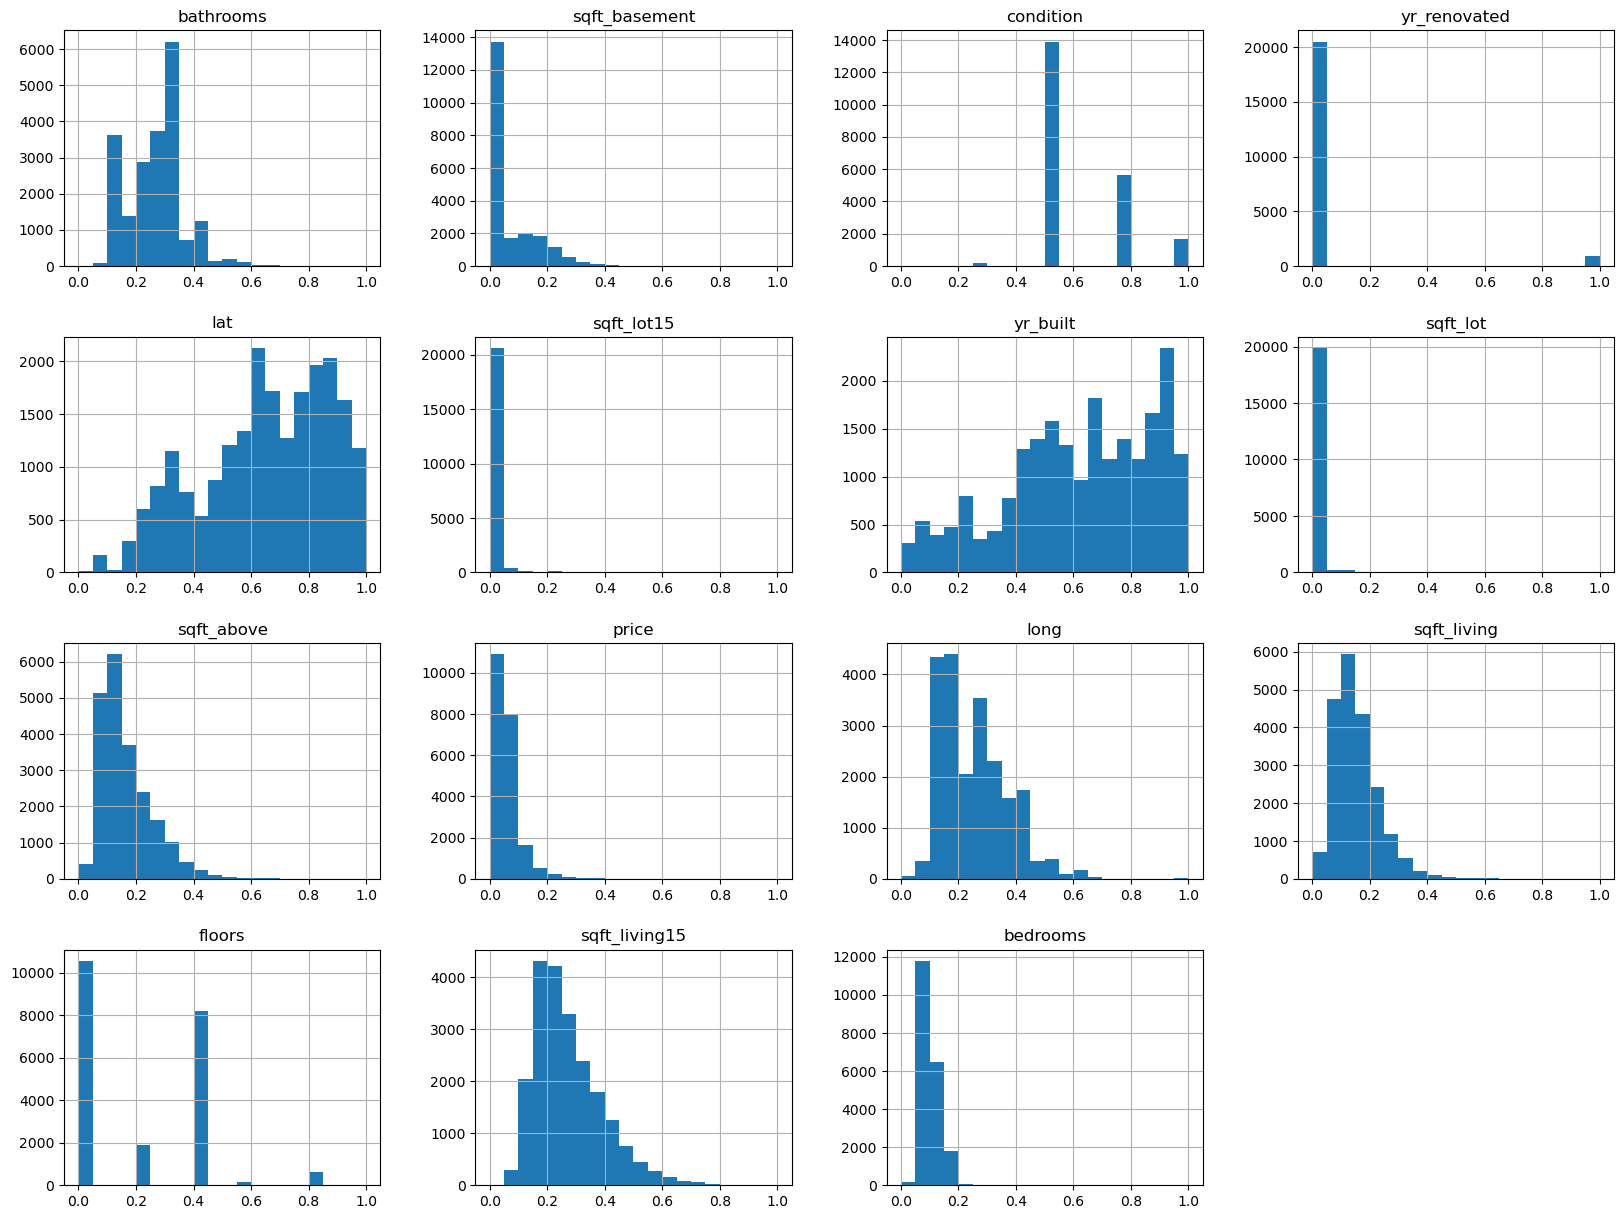

In [35]:
df[numerical_vars].hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
#2nd boxplots

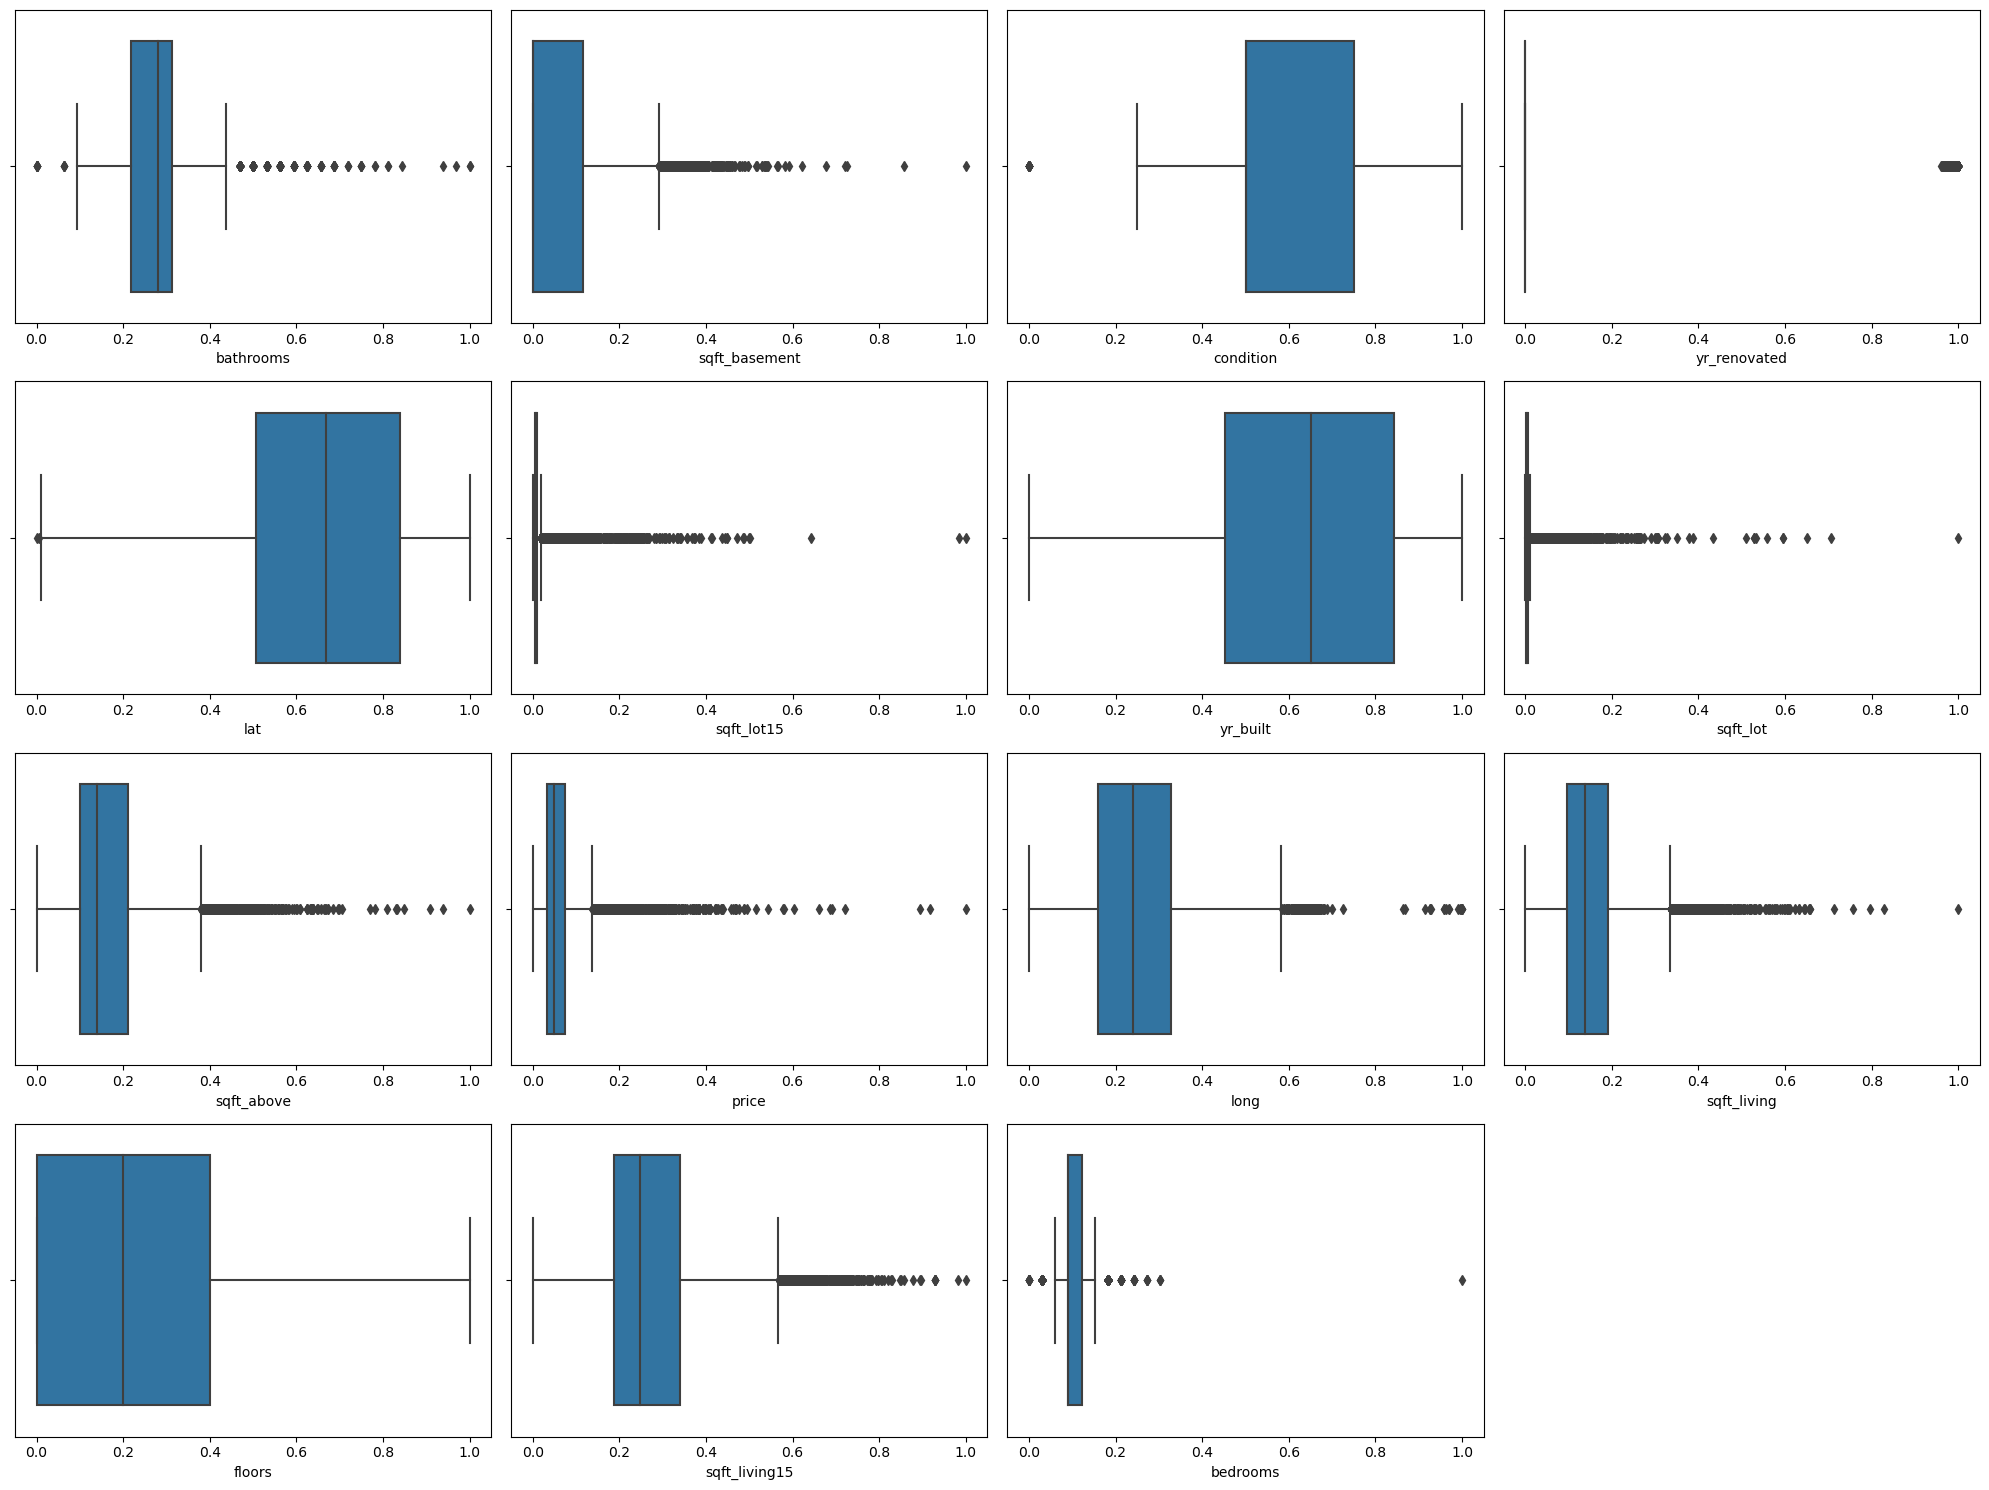

In [39]:
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[var])
plt.tight_layout()
plt.show()

In [ ]:
#2.3. Correlation Analysis

In [40]:
correlation_matrix = df[numerical_vars].corr()
correlation_matrix
#we can explain this correlation table

,bathrooms,sqft_basement,condition,yr_renovated,lat,sqft_lot15,yr_built,sqft_lot,sqft_above,price,long,sqft_living,floors,sqft_living15,bedrooms
bathrooms,1.000000,0.283793,-0.128978,0.050288,0.026288,0.088079,0.506894,0.086255,0.685186,0.525929,0.223207,0.753891,0.500541,0.569045,0.516519
sqft_basement,0.283793,1.000000,0.174463,0.071909,0.109208,0.017283,-0.134590,0.015422,-0.052456,0.323975,-0.145846,0.432196,-0.246066,0.199247,0.302096
condition,-0.128978,0.174463,1.000000,-0.061136,-0.015402,-0.003731,-0.364947,-0.009517,-0.160782,0.034532,-0.107780,-0.061867,-0.266543,-0.095002,0.027719
yr_renovated,0.050288,0.071909,-0.061136,1.000000,0.029206,0.007870,-0.225697,0.009009,0.022666,0.126717,-0.068736,0.056740,0.005626,-0.002677,0.019726
lat,0.026288,0.109208,-0.015402,0.029206,1.000000,-0.086505,-0.148606,-0.088051,-0.001652,0.306754,-0.136369,0.049748,0.049279,0.047668,-0.010683
sqft_lot15,0.088079,0.017283,-0.003731,0.007870,-0.086505,1.000000,0.070307,0.728352,0.193413,0.081645,0.254280,0.181179,-0.011917,0.182441,0.025384
yr_built,0.506894,-0.134590,-0.364947,-0.225697,-0.148606,0.070307,1.000000,0.051520,0.422838,0.051071,0.408531,0.318292,0.489062,0.324568,0.155887
sqft_lot,0.086255,0.015422,-0.009517,0.009009,-0.088051,0.728352,0.051520,1.000000,0.180174,0.087300,0.229380,0.167418,-0.006467,0.144130,0.028575
sqft_above,0.685186,-0.052456,-0.160782,0.022666,-0.001652,0.193413,0.422838,0.180174,1.000000,0.604626,0.343115,0.875944,0.522648,0.731992,0.479294
price,0.525929,0.323975,0.034532,0.126717,0.306754,0.081645,0.051071,0.087300,0.604626,1.000000,0.019412,0.700997,0.254964,0.583930,0.311754


In [ ]:
#visualize the correlation with Heatmap, to check for multicollinearity

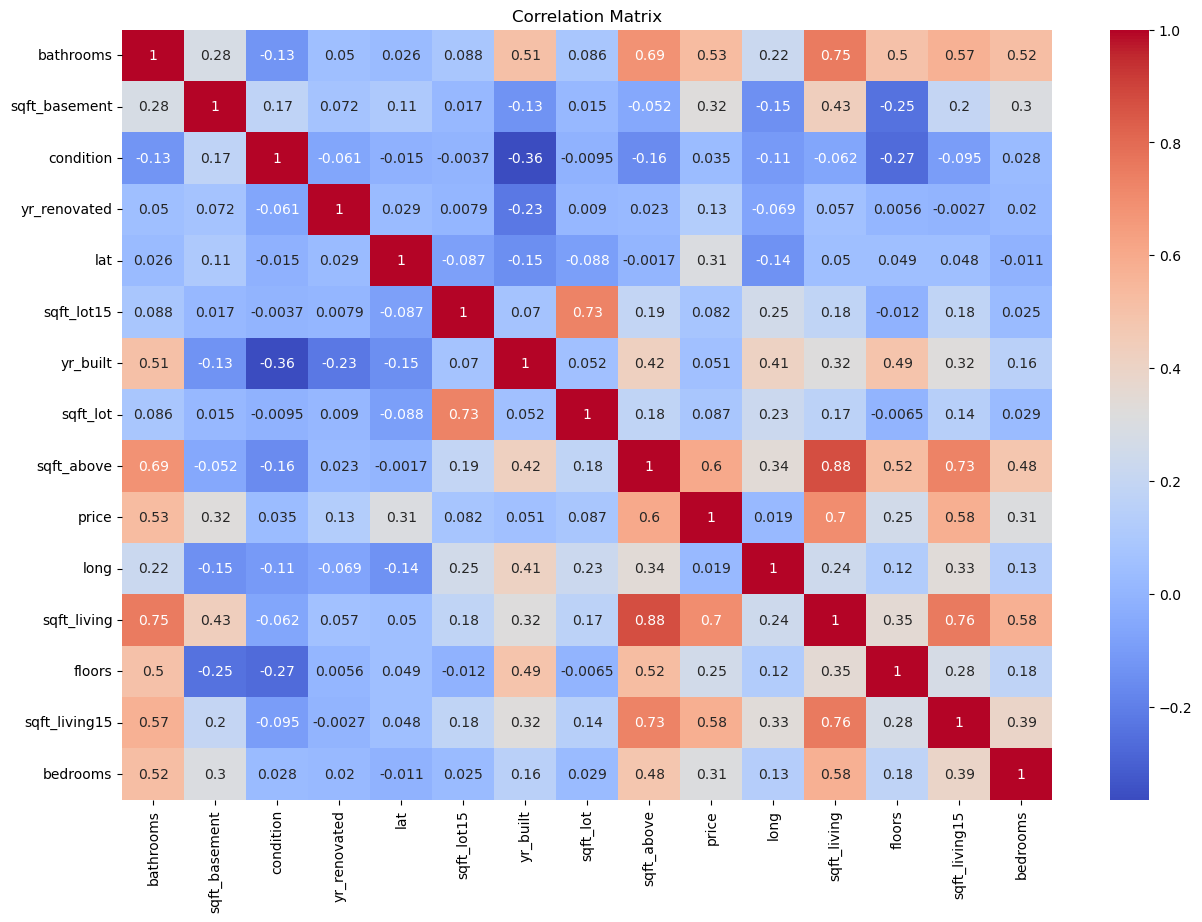

In [54]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# having our dependent variable 'Price', 
# we choose independent variables that have correlation with price, corr > o.5 and corr <-0.5

In [47]:
# Extracting correlations with the target variable 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Display correlations with price
print(correlation_with_price)


price            1.000000
sqft_living      0.700997
sqft_above       0.604626
sqft_living15    0.583930
bathrooms        0.525929
sqft_basement    0.323975
bedrooms         0.311754
lat              0.306754
floors           0.254964
yr_renovated     0.126717
sqft_lot         0.087300
sqft_lot15       0.081645
yr_built         0.051071
condition        0.034532
long             0.019412
Name: price, dtype: float64


In [55]:
# Select variables with strong correlation to price
strong_correlations = correlation_with_price[abs(correlation_with_price) > 0.5]
print(strong_correlations)


price            1.000000
sqft_living      0.700997
sqft_above       0.604626
sqft_living15    0.583930
bathrooms        0.525929
Name: price, dtype: float64


In [ ]:
#now we check for multicollinearity between our selected variables

In [75]:
X = df [['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']].dropna()
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature        VIF
0          const  10.344045
1    sqft_living   5.957191
2     sqft_above   4.527105
3  sqft_living15   2.461869
4      bathrooms   2.331625


In [ ]:
#since the VIF is slightly above 5, we will try to combine 'sqft_living' + 'sqft_living15' and take average 

In [77]:
df['sqft_combined'] = (df['sqft_living'] + df['sqft_living15']) / 2
X = df[['sqft_combined', 'sqft_above', 'bathrooms']].dropna()


In [78]:
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature       VIF
0          const  9.451947
1  sqft_combined  3.658366
2     sqft_above  3.666358
3      bathrooms  2.037073


In [ ]:
# now that our VIF are lower than 5 we can proceed train and test split.